In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First Impression

In [71]:
# LOAD DATA
df = pd.read_csv("protein.csv")

In [72]:
# DATA DESCRIPTION
print(f"{'-'*8} * DATA HEAD * {'-'*8}")
print(df.head())

print(f"\n{'-'*6} * DESCRIBE DATA * {'-'*6}")
print("Shape:", df.shape)
print("Missing value:", df.isnull().sum().sum())
print(df.describe())

-------- * DATA HEAD * --------
     RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147  

------ * DESCRIBE DATA * ------
Shape: (45730, 10)
Missing value: 0
               RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663  

# Data Plotting

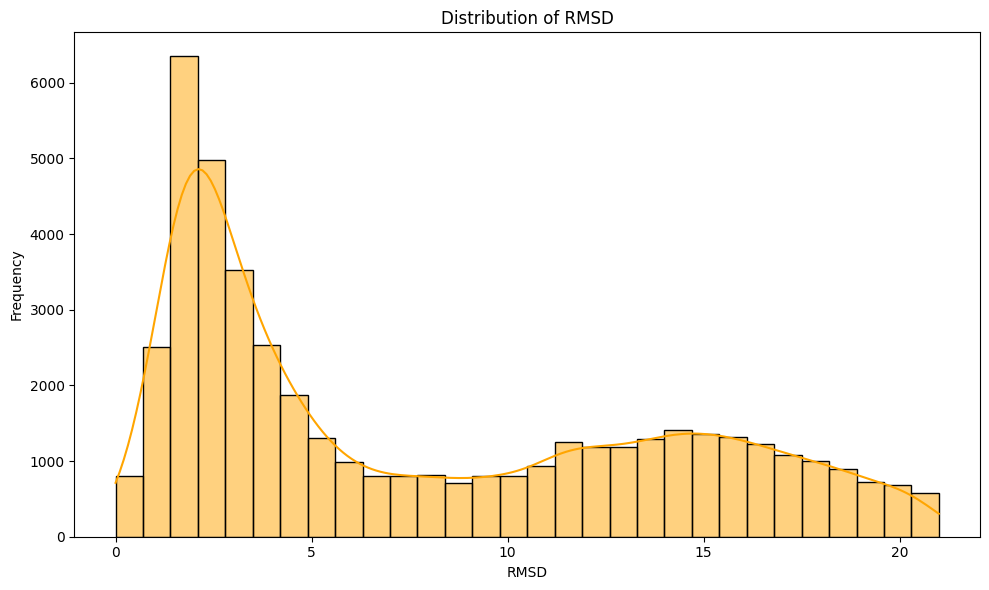

In [54]:
plt.figure(figsize=(10, 6))

sns.histplot(df['RMSD'], bins=30, kde=True, color='orange')
plt.title("Distribution of RMSD")
plt.xlabel("RMSD")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

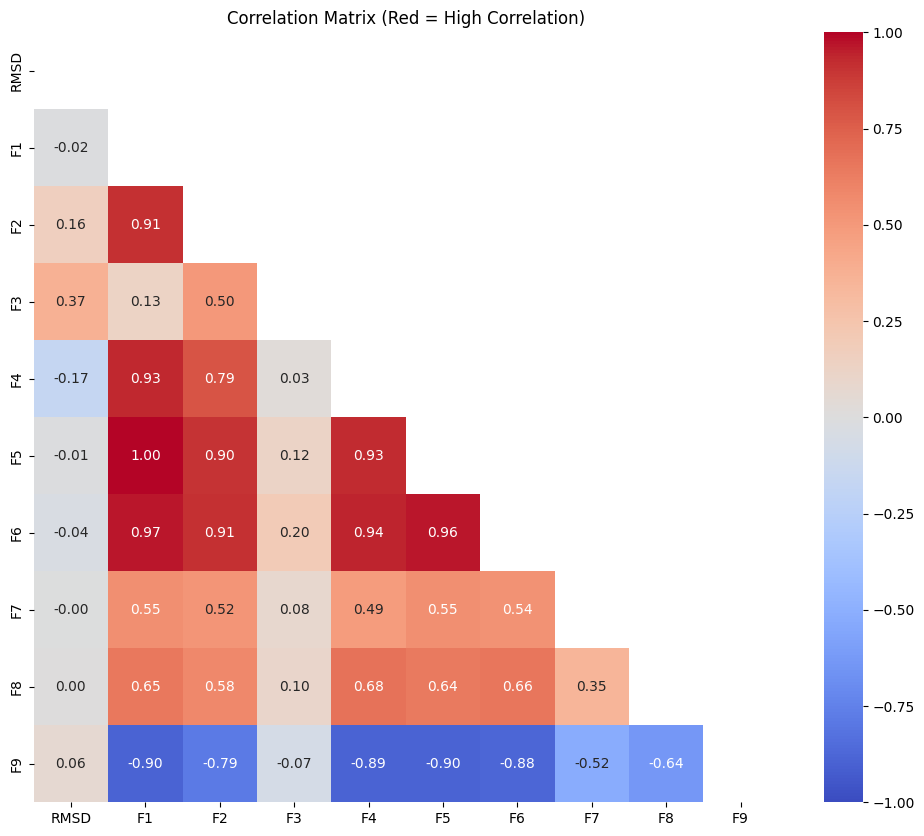

In [16]:
plt.figure(figsize=(12, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Red = High Correlation)")
plt.show()

In [58]:
# DROPPING REDUNDANT FEATURES (HIGH CORRELATION TO EACH OTHER)
abs_corr = corr.abs()
upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
cleaned_corr = abs_corr.drop(index=to_drop, columns=to_drop)
rmsd_corr = cleaned_corr["RMSD"].drop("RMSD")

print(rmsd_corr)

F1    0.015087
F3    0.374309
F7    0.003339
F8    0.000344
F9    0.062830
Name: RMSD, dtype: float64


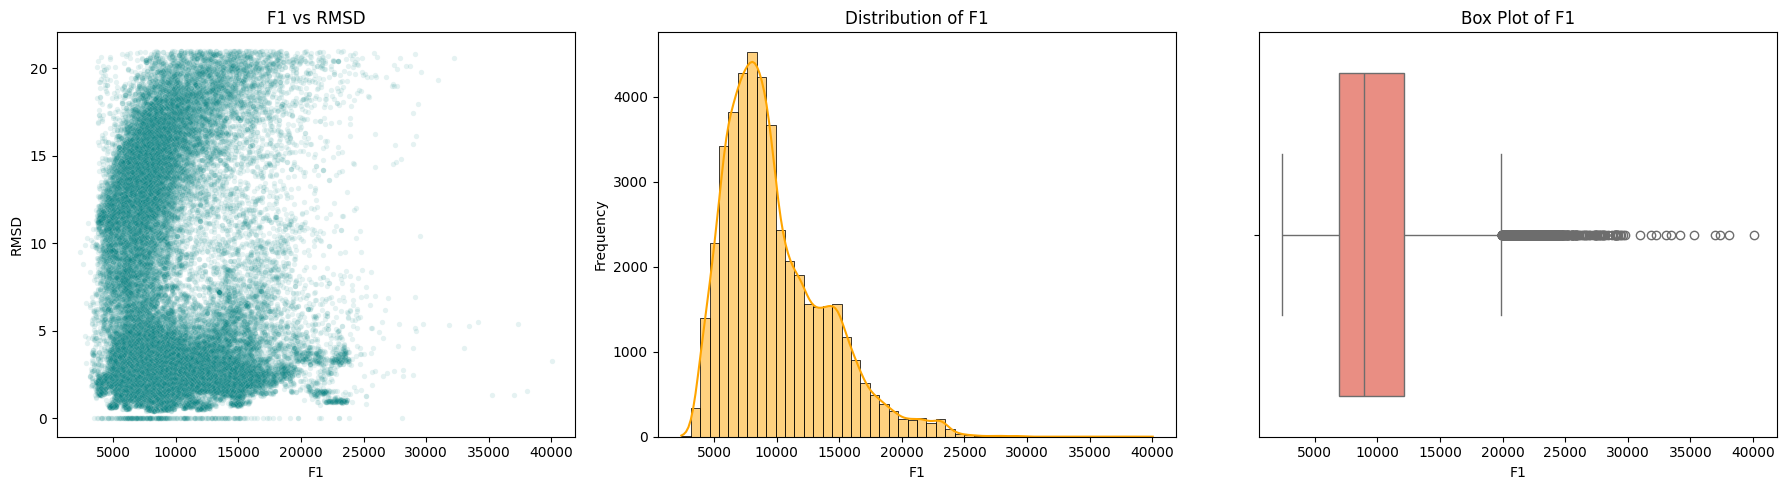

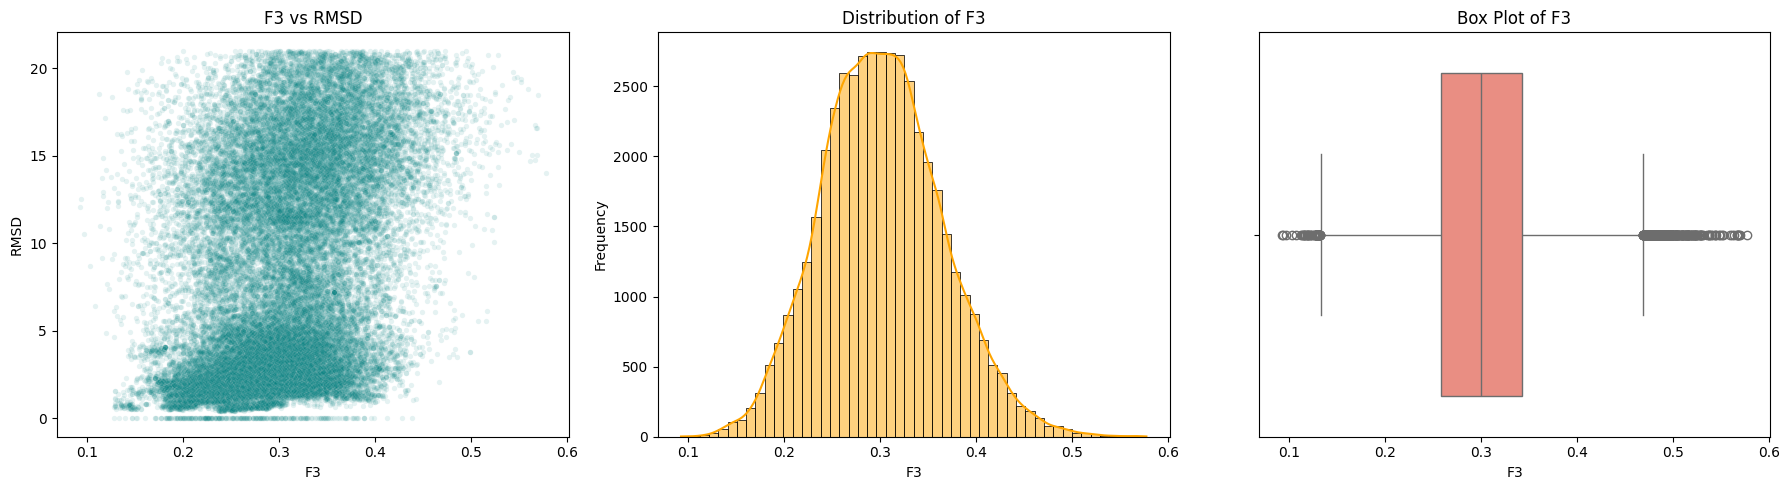

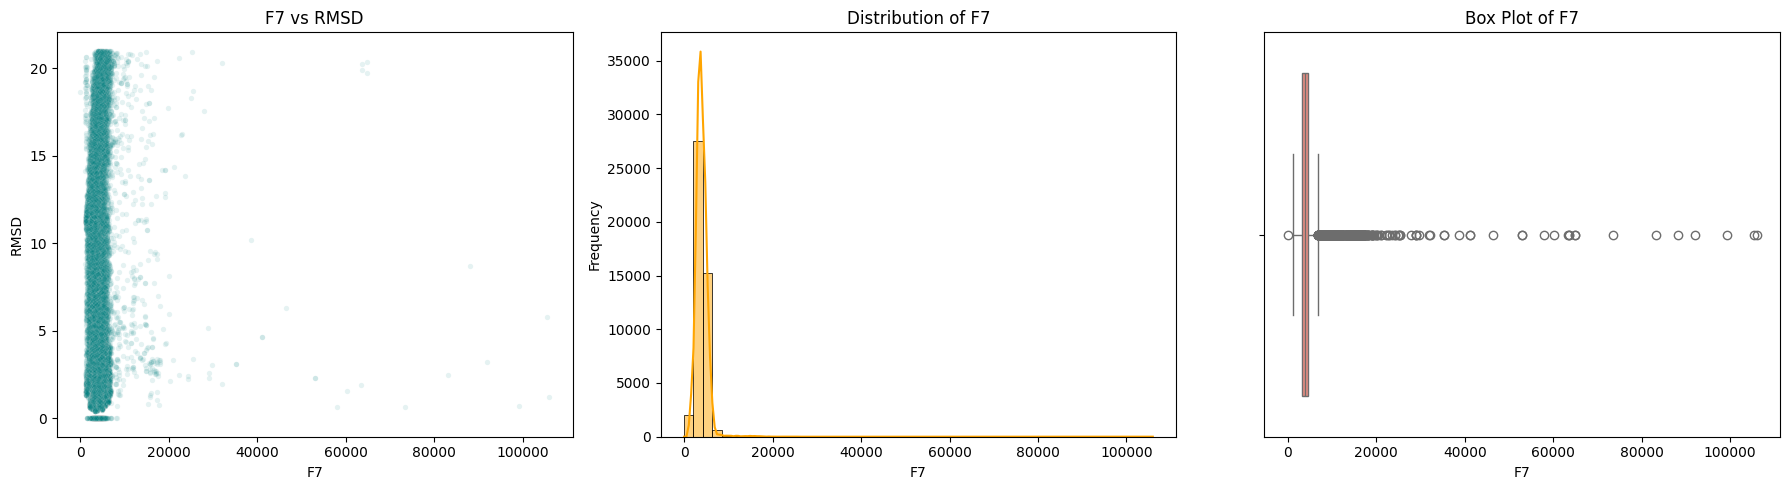

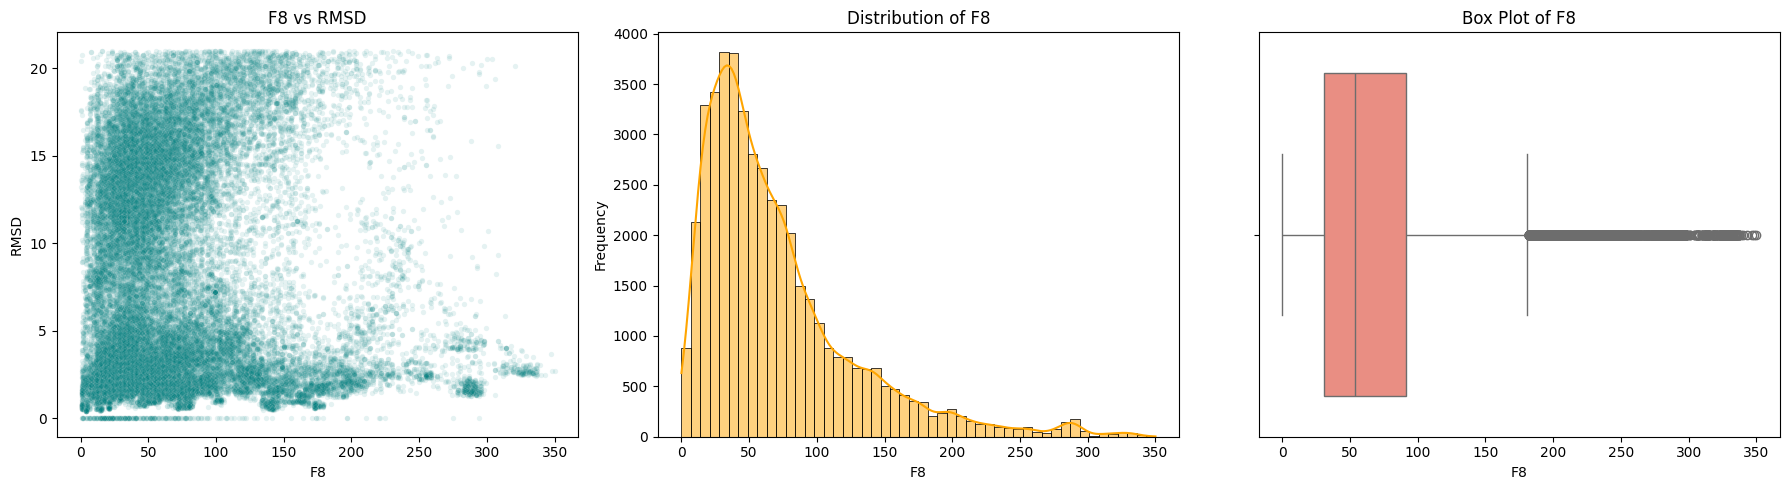

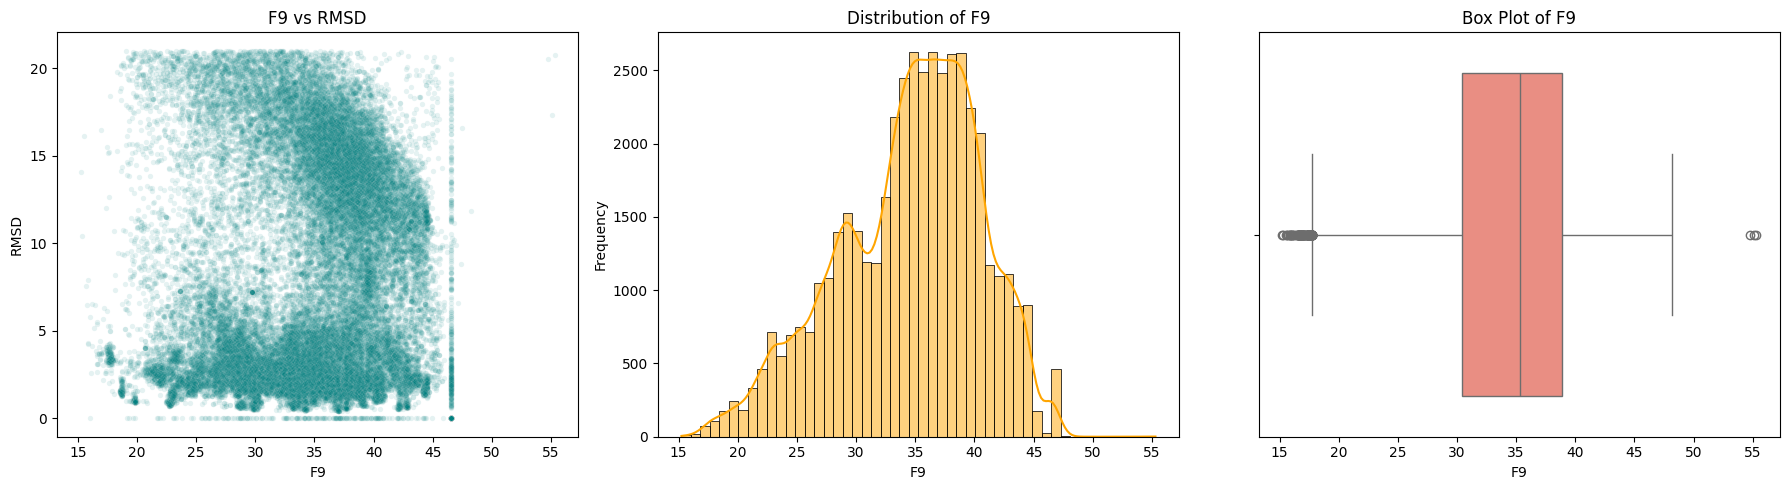

In [70]:
# DATA PLOTTING
for feature in rmsd_corr.index:
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  # SCATTER PLOT
  sns.scatterplot(x=df[feature], y=df['RMSD'], alpha=0.1, s=15, color='teal', ax=axes[0])
  axes[0].set_title(f"{feature} vs RMSD")
  axes[0].set_ylabel("RMSD")

  # HISTOGRAM
  sns.histplot(df[feature], bins=50, kde=True, color='orange', ax=axes[1])
  axes[1].set_title(f"Distribution of {feature}")
  axes[1].set_ylabel("Frequency")

  # BOX PLOT
  sns.boxplot(x=df[feature], color='salmon', ax=axes[2])
  axes[2].set_title(f"Box Plot of {feature}")
  plt.tight_layout()
  plt.show()